# Project: Unsupervised Learning - Credit Card Customer Segmentation

The objective of this project is to identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.
### Background
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

#### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

#### Read the dataset into dataframe

In [2]:
df = pd.read_excel('Credit Card Customer Data.xlsx')
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


## Univariate analysis

#### Check data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
print(df.shape)

(660, 7)


In [5]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#### statistical summary

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


## Conclusions from Initial Data Analysis
-	All coumns are numeric values
-	There are no cells with missing/invalid data
-	Sl no and customer key has to be dropped from the data set as it has no meaning in clustering
-   Data has to be scaled

In [7]:
##Remove id since it is redundant
df.drop(['Sl_No','Customer Key'], axis=1, inplace=True)

In [8]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


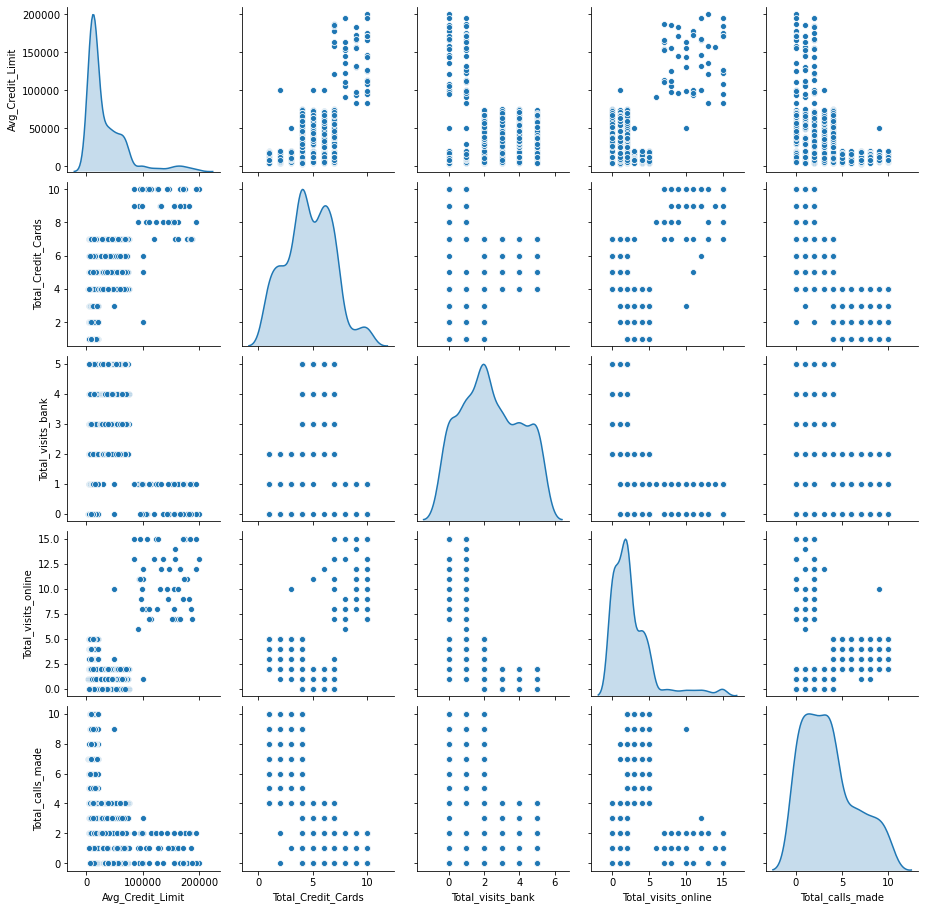

In [9]:
sns.pairplot(df, diag_kind='kde') 

#### Data is not normally distributed as there are multiple peaks along the diagonal of pair plots. We can assume that there exist multiple clusters

#### Scale the data

In [10]:
df_z = df.apply(zscore)

In [11]:
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


# KMeans Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

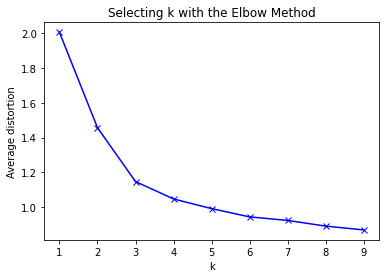

In [12]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### We see a drop after 3rd cluster. We can think of 4 clusters in this case

In [13]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,2040.989816
2,3,933.043749
3,4,780.773690
4,5,704.475919
5,6,667.805630
6,7,600.436607
7,8,570.266791
8,9,536.805803


#### After 4th cluster, the reduction in error is coming down. So we will use K=4 for for KMeans clustering

In [14]:
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12)

In [15]:
kmeans.fit(df_z)

KMeans(n_clusters=4, n_init=5, random_state=12)

In [16]:
centroids = kmeans.cluster_centers_

In [17]:
centroids

array([[ 0.03538264,  0.37695296,  0.04560145, -0.55776778, -0.52667828],
       [-0.59597409, -1.06749333, -0.904851  ,  0.33018588,  1.16645969],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.08904777,  0.35679514,  1.29571325, -0.54390138, -0.5750638 ]])

In [18]:
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )

In [19]:
centroid_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.035383,0.376953,0.045601,-0.557768,-0.526678
1,-0.595974,-1.067493,-0.904851,0.330186,1.166460
2,2.831764,1.862226,-1.105763,2.827319,-0.874330
3,-0.089048,0.356795,1.295713,-0.543901,-0.575064


In [20]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [21]:
# Joining the label dataframe with the data frame.
df_labeled = df_z.join(df_labels)

In [22]:
df_labeled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,1
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,0
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,1
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,1


In [23]:
df_labeled['labels'].value_counts()  

1    221
0    199
3    190
2     50
Name: labels, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BF3B73CD0>,
      dtype=object)

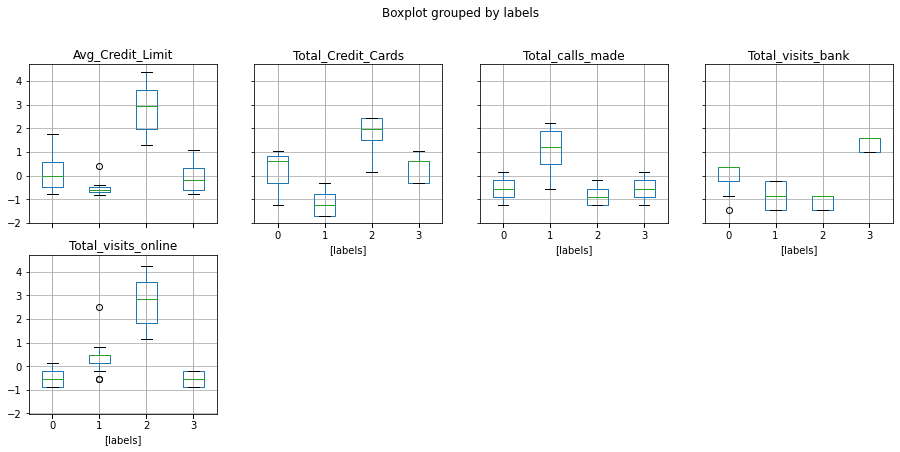

In [24]:
df_labeled.boxplot(by = 'labels',  layout=(3,4), figsize=(15, 10))

### Try with 3 clusters

In [25]:
kmeans_3 = KMeans(n_clusters=3, n_init = 5, random_state=12)
kmeans_3.fit(df_z)

KMeans(n_clusters=3, n_init=5, random_state=12)

In [26]:
df_labels_3 = pd.DataFrame(kmeans_3.labels_ , columns = list(['labels']))
df_labels_3['labels'] = df_labels_3['labels'].astype('category')

In [27]:
df_labeled_3 = df_z.join(df_labels_3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BF53B17F0>,
      dtype=object)

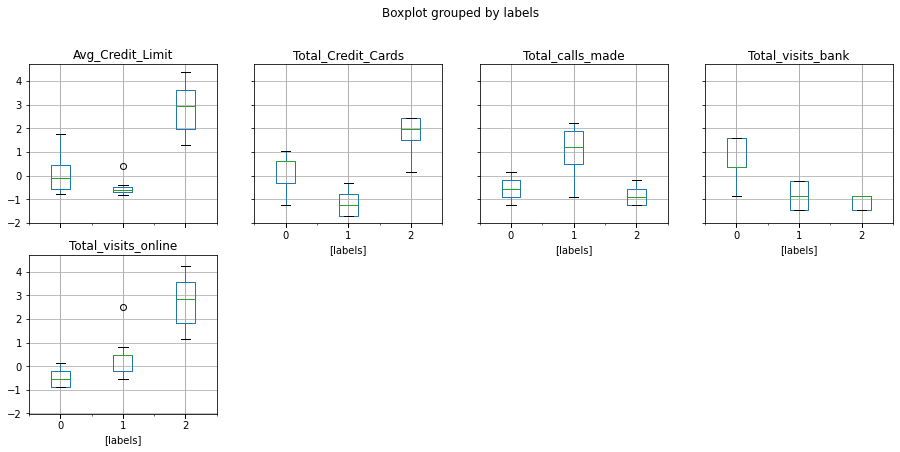

In [28]:
df_labeled_3.boxplot(by = 'labels',  layout=(3,4), figsize=(15, 10))

In [29]:
kMeansClust = df_labeled_3.groupby(['labels'])
kMeansClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,-0.021062,0.373690,0.666395,-0.553672,-0.553005
1,-0.595796,-1.059623,-0.901518,0.322997,1.148109
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


#### 3 clusters give better segregation. Also the reduction in distortion error was less when the cluster is increased from 3 to 4. So we can go with 3 clusters to better understand the clusters

### KMeans Clustering conclusions
- Cluster 3 is characterized  by high credit card limit, high number of credit cards, less calls, less visits to bank and more online visits. 
- Clusters 2 is characterized  by very less credit limit, low number of credit cards, very high number of calls made, less visits to bank, few visits online.
- Cluster 1 is characterized  by less credit limit, less number of cards, less calls, very high number of bank visits and very few online visits
- KMeans with 3 clusters gives a very good level of segregation

# Hierarchical Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

### Cophenetic coefficient

In [31]:
Z = linkage(df_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_z))
c

0.8977080867389372

#### Cophenetic coefficient of 0.9 is good

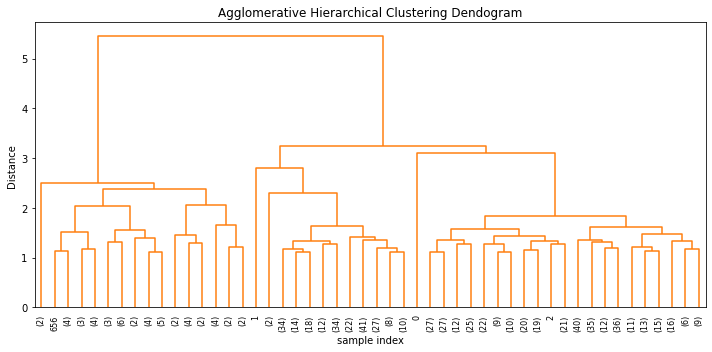

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. ,p=50,truncate_mode='lastp')
plt.tight_layout()

In [33]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [34]:
model.fit(df_z)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [35]:
df_labels_hier = pd.DataFrame(model.labels_ , columns = list(['labels']))
df_labels_hier['labels'] = df_labels_hier['labels'].astype('category')

In [36]:
df_labels_hier = df_z.join(df_labels_hier)

In [37]:
df_labels_hier.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BF5974790>,
      dtype=object)

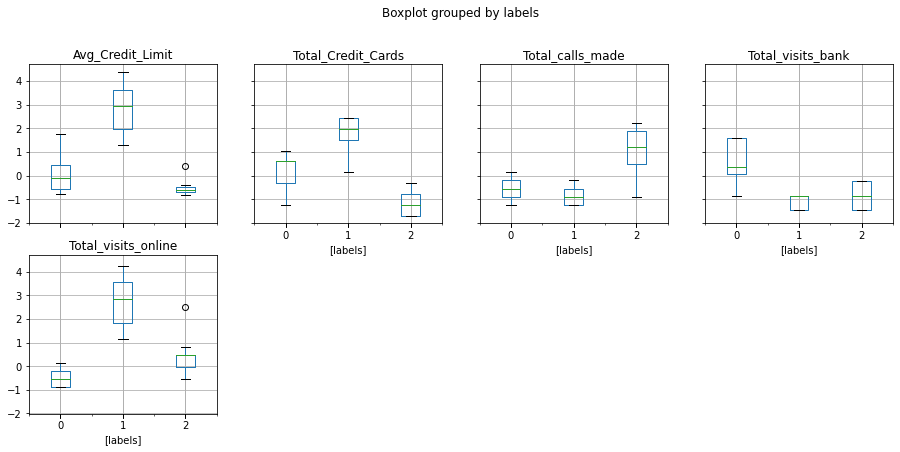

In [38]:
df_labels_hier.boxplot(by = 'labels',  layout=(3,4), figsize=(15, 10))

In [39]:
heirClust = df_labels_hier.groupby(['labels'])
heirClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,-0.022902,0.371882,0.664034,-0.552775,-0.551200
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.595179,-1.062913,-0.904453,0.325372,1.152605


### Hierarchical Clustering clusions
- We get the 3 clusters with same characteristics as of Kmeans for credit limit, number of cards, total calls made, total bank visits and total online visits. 

### silhouette score 

In [40]:
max_d = 3.2

In [41]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [42]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(df_z,clusters)

0.515922432650965

# Conclusions

- Both Kmenas and hierarchical clustering gives clusters with similar characteristics for credit limit, number of cards, total calls made, total bank visits and total online visits.
- Cluster 1 is characterized  by less credit limit, less number of cards, less calls, very high number of bank visits and very few online visits
- Clusters 2 is characterized by very liss credit limit, low number of credit cards, very high number of calls made, less visits to bank, few visits online.
- Cluster 3 is characterized by high credit card limit, high number of credit cards, less calls, less visits to bank and more online visits. 
- The clusters gives us very good seperation of variables. It is easy for the bank to visualize the segments
- Clusters 3 is very profitable to the bank. They have higher spending(more cards, more online visits and more credit limit) and they require lower service(less calls and less branch visits). Bank should focus on this clusters being satisfied. 
- Cluster 2 is not profitable to the bank. Credit limit and no of cards are very less. They make very high number of calls. Customer service should be improved to encourage them make more online services to make this segment profitable.
- Clusters 1 makes high number of bank visits
